<h2 style="font-family:Comic Sans MS; color:purple">1. Travel insurance prediction Dataset</h2>

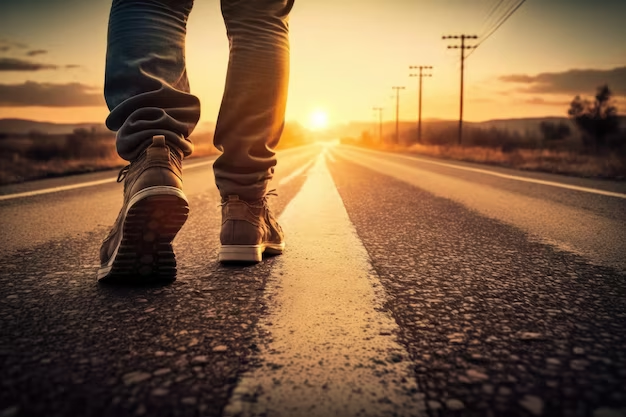

<div style="text-align: left;">
    <table>
        <tr>
            <th><b>Attribute</b></th>
            <th><b>Details</b></th>
        </tr>
        <tr>
            <td><b>Author</b></td>
            <td><b>Muhammad Tayyab Ali</b></td>
        </tr>
        <tr>
            <td>GitHub</td>
            <td><a href="https://github.com/TayyabAli92"><img src="https://img.shields.io/badge/GitHub-Profile-red?style=for-the-badge&logo=github" alt="GitHub"/></a></td>
        </tr>
        <tr>
            <td>LinkedIn</td>
            <td><a href="https://www.linkedin.com/in/tayyab-ali-personal-86a3582b8/"><img src="https://img.shields.io/badge/LinkedIn-Profile-red?style=for-the-badge&logo=linkedin" alt="LinkedIn"/></a></td>
        </tr>
        <tr>
            <td>Twitter</td>
            <td><a href="https://twitter.com/Tayyab_Ali92"><img src="https://img.shields.io/badge/Twitter-Profile-red?style=for-the-badge&logo=twitter" alt="Twitter"/></a></td>
        </tr>
        <tr>
            <td>Facebook</td>
            <td><a href="https://www.facebook.com/profile.php?id=61556758989955"><img src="https://img.shields.io/badge/Facebook-Profile-red?style=for-the-badge&logo=facebook" alt="Facebook"/></a></td>
        </tr>
        <tr>
            <td>Gmail</td>
            <td><a href="tayyabali.personal@gmail.com"><img src="https://img.shields.io/badge/Gmail-Contact%20Me-green?style=for-the-badge&logo=gmail" alt="Gmail"/></a></td>
        </tr>
    </table>
</div>

<h2 style="font-family:Comic Sans MS; color:purple">2. Import Libraries</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

<h2 style="font-family:Comic Sans MS; color:purple">3. Load the Dataset</h2>

In [2]:
df = pd.read_csv('./data/TravelInsurancePrediction.csv')

In [3]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


<h2 style="font-family:Comic Sans MS; color:purple">4. Exploratory Data Analysis (EDA)</h2>

In [4]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [5]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [6]:
df.replace('-','nan')
df.replace('na','nan')

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [7]:
df.isnull().sum()

Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [9]:
df["TravelInsurance"]= df["TravelInsurance"].map({0: "not purchased", 1: "purchased"})

<h2 style="font-family:Comic Sans MS; color:purple">5. Ploting</h2>

In [10]:
df = df
figure = px.histogram(df, x ="Age", color = "TravelInsurance", title = "Factors affecting purchase of travel insurance: age")
figure.show()

In [11]:
df = df
figure = px.histogram(df, x="Employment Type", color= "TravelInsurance", title= "Factors affecting purchase of travel insurance: age")
figure.show()

In [12]:
df = df
figure = px.histogram(df, x="AnnualIncome", color= "TravelInsurance", title= "Factors affecting purchase of travel insurance: age")
figure.show()

In [13]:
df["GraduateOrNot"]=df["GraduateOrNot"].map({"No":0, "Yes":1})
df["FrequentFlyer"]=df["FrequentFlyer"].map({"No":0, "Yes":1})
df["EverTravelledAbroad"]=df["EverTravelledAbroad"].map({"No":0, "Yes":1})

In [14]:
X = np.array(df[["Age","GraduateOrNot", "AnnualIncome","FamilyMembers", "ChronicDiseases","FrequentFlyer","EverTravelledAbroad"]])
y = np.array(df[["TravelInsurance"]])

In [15]:
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()

In [16]:
model.fit(Xtrain, ytrain)

DecisionTreeClassifier()

In [17]:
predictions=model.predict(Xtest)

In [18]:
predictions

array(['not purchased', 'purchased', 'not purchased', 'purchased',
       'purchased', 'purchased', 'not purchased', 'not purchased',
       'not purchased', 'not purchased', 'purchased', 'purchased',
       'purchased', 'not purchased', 'not purchased', 'purchased',
       'not purchased', 'not purchased', 'not purchased', 'not purchased',
       'not purchased', 'purchased', 'not purchased', 'not purchased',
       'not purchased', 'not purchased', 'not purchased', 'not purchased',
       'not purchased', 'not purchased', 'not purchased', 'not purchased',
       'purchased', 'not purchased', 'not purchased', 'not purchased',
       'not purchased', 'not purchased', 'not purchased', 'not purchased',
       'purchased', 'not purchased', 'not purchased', 'purchased',
       'not purchased', 'not purchased', 'not purchased', 'purchased',
       'purchased', 'not purchased', 'not purchased', 'not purchased',
       'not purchased', 'purchased', 'not purchased', 'purchased',
       'purcha

In [19]:
print(accuracy_score(ytest,predictions))

0.8190954773869347
